<h1>Practice Session 1</h1>


Estimated time needed: **30** minutes


<h2>Objectives</h2>


In today's lab, you will apply geometric transformations and other operations to an image. The questions are written in bold, mention their corresponding answers below them.


**Download any image for the lab and save it to your drive folder.** 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",)

Mounted at /content/gdrive


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Image and Video class')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/Colab Notebooks/Image and Video class
/content/gdrive/My Drive/Colab Notebooks/Image and Video class


We will import the following:


In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import argparse
import imutils

First, let's define a helper function to plot  image on colab. This function will be used repeatedly in this notebook to showcase the results.


In [6]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

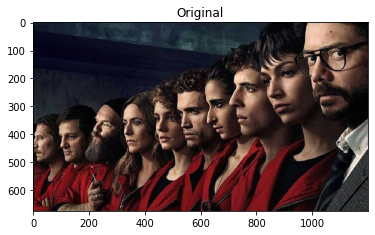

In [ ]:
args = {
	"image": "money heist.jpg",
}
image = cv2.imread(args["image"])
plt_imshow("Original",image)

#Geometric Transformations


Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


**Create a grayscale image of size 6x6, Set Boundary Pixels to Black and Remaining Pixels to white. Display the Image.**

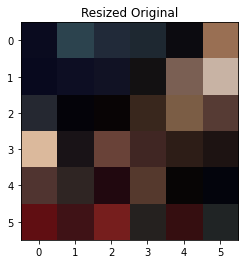

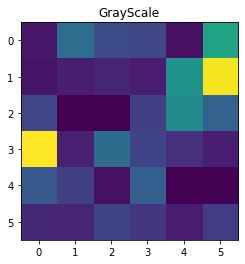

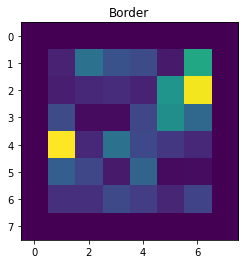

In [ ]:
img=cv2.resize(image,(6,6))
plt_imshow("Resized Original",img)
img2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt_imshow("GrayScale",img2)
gray = cv2.copyMakeBorder(img2, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, value = 0)
plt_imshow("Border",gray)

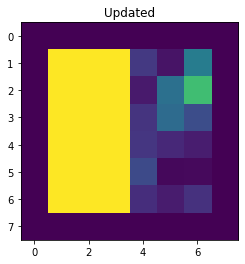

In [ ]:
gray[1:7, 1:4] = (255, 255, 255)
plt_imshow("Updated", gray)

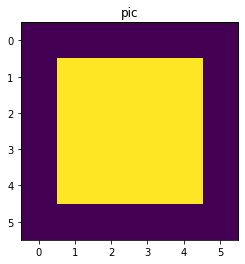

In [9]:
border_img = (np.ones([ 6 , 6 ]).astype(np.uint8))* 255
border_img[0, :] = 0
border_img[:, 0] = 0
border_img[-1 , :] = 0
border_img[:, -1] = 0

plt_imshow("pic",border_img)

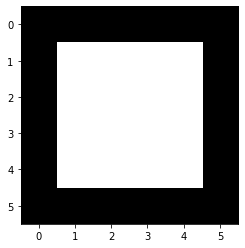

In [ ]:
from PIL import Image
dim = 6
arr = np.full((dim,dim), 255.)
arr[:, 0], arr[0,:], arr[:, dim-1], arr[dim-1, :] = 0,0,0,0
image = Image.fromarray(arr)
plt.imshow(image)

We can rescale along a specific axis:

*   `fx`: scale factor along the horizontal axis
*   `fy`: scale factor along the vertical axis


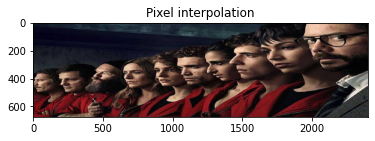

In [ ]:
fx = int(image.shape[1] * 2)
fy = int(image.shape[0] * 1)
dim=(fx,fy)
img2 = cv2.resize(image, dim, interpolation=cv2.INTER_NEAREST)

plt_imshow("Pixel interpolation",img2)

**Upload an image of your choice and display it here.**

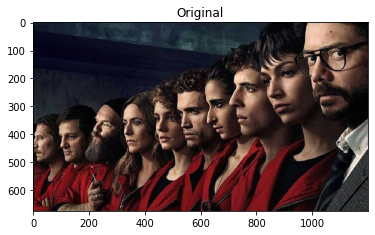

In [ ]:
args = {
	"image": "money heist.jpg",
}
image = cv2.imread(args["image"])
plt_imshow("Original",image)

**Scale the horizontal axis by two and leave the vertical axis as is. Use inter cubic interpolation.**


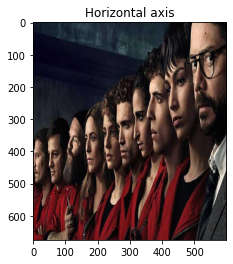

In [ ]:
scale = 0.5
width = int(image.shape[1] * scale)
height = int(image.shape[0])
dim=(width,height)
img2 = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

plt_imshow("Horizontal axis",img2)

**Now scale the vertical axis by four.**


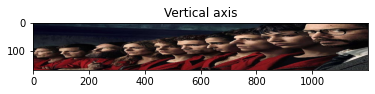

In [ ]:
scale = 0.25
width = int(image.shape[1])
height = int(image.shape[0] * scale)
dim=(width,height)
img3 = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

plt_imshow("Vertical axis",img3)

**Shrink the image by setting the scaling factor to a real number between 0 and 1.**


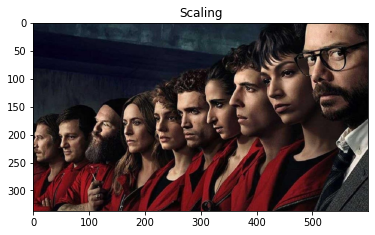

In [ ]:
scale = 0.5
width = int(image.shape[1] * scale)
height = int(image.shape[0] * scale)
dim=(width,height)
img3 = cv2.resize(image, dim)
plt_imshow("Scaling",img3)

**Instead of using scaling factors, specify the number of rows and columns of the resultant image and resize. Display both original and resized image.**


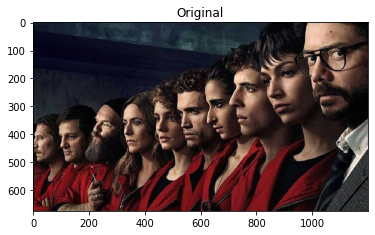

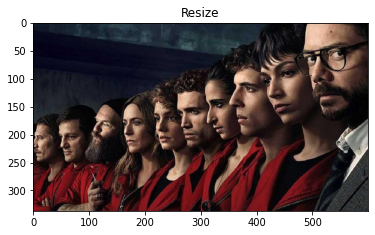

In [ ]:
width = image.shape[1]
height = image.shape[0]

img4 = cv2.resize(image, (width//2, height//2))
plt_imshow("Original",image)
plt_imshow("Resize",img4)

## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

**Upload an image and shift the image 100 pixels horizontally by constructing transformation matrix.**


In [ ]:
width = image.shape[1]
height = image.shape[0]
print(width)
print(height)

1200
675


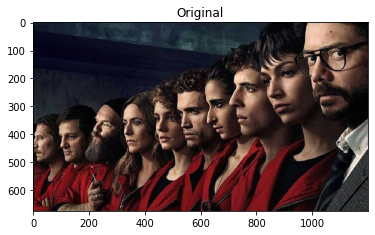

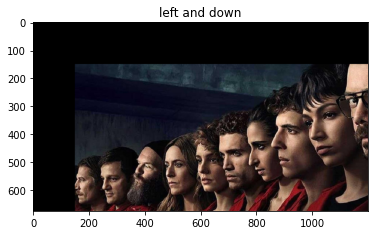

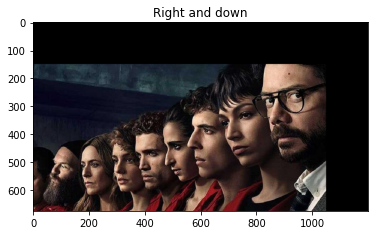

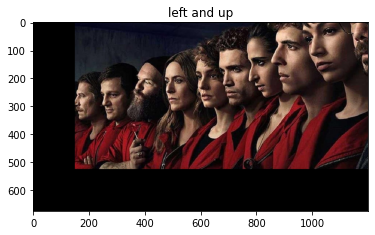

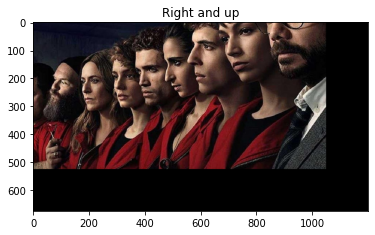

In [ ]:
M = np.float32([[1,0,150],[0,1,150]])
shift = cv2.warpAffine(image, M, (width,height))

plt_imshow("Original", image)
plt_imshow("left and down", shift)

M = np.float32([[1,0,-150],[0,1,150]])
shift1 = cv2.warpAffine(image, M, (width,height))
plt_imshow("Right and down", shift1)

M = np.float32([[1,0,150],[0,1,-150]])
shift1 = cv2.warpAffine(image, M, (width,height))
plt_imshow("left and up", shift1)

M = np.float32([[1,0,-150],[0,1,-150]])
shift1 = cv2.warpAffine(image, M, (width,height))
plt_imshow("Right and up", shift1)

## Rotation


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


**Rotate your uploaded image by 45 degrees.**


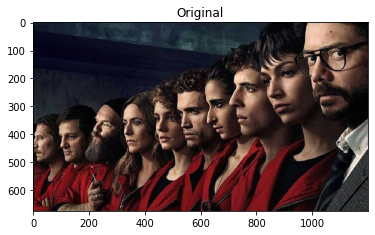

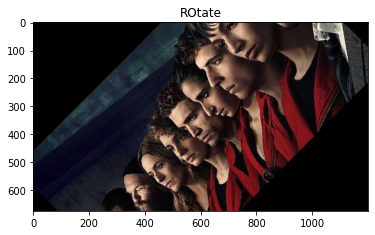

In [ ]:
center = (width//2, height//2)
M = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotate = cv2.warpAffine(image, M,(width,height))
plt_imshow("Original",image)
plt_imshow("ROtate",rotate)

## Other Mathematical Operations

**Upload an image and increase the brightness of the image by applying any suitable mathematical operation. Display the original and brihtened image.**


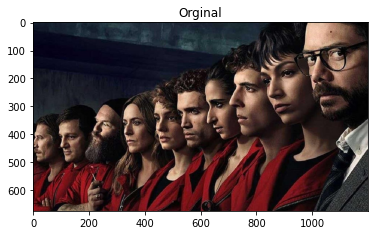

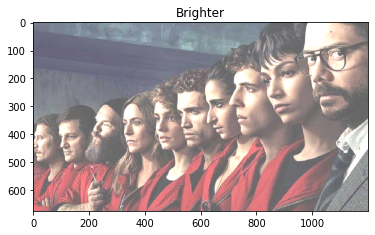

In [ ]:
M=np.ones(image.shape,dtype="uint8")*100
added=cv2.add(image,M)
plt_imshow("Orginal",image)
plt_imshow("Brighter",added)

**Generate an array of random noises with the same shape and data type as your input image. This noise array can contain any random values.**


In [ ]:
image.shape

(675, 1200, 3)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
from skimage.util import random_noise
noise_img = random_noise(img, mode='s&p',amount=0.1)

**Add the generated noise to the image and plot the result. Observe the original and corrupted image.**


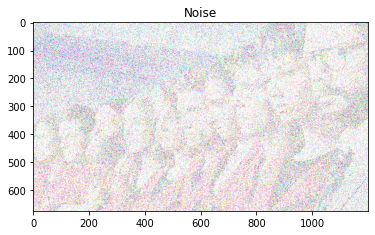

In [ ]:
noise_img = np.array(252*noise_img, dtype = 'uint8')
plt_imshow("Noise",noise_img)